In [1]:
#Import your Libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import sklearn.metrics as metrics
%matplotlib inline

In [5]:
%%timeit -n 1
# Load your data
df = pd.read_csv('data.csv')

21.2 ms ± 1.56 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [6]:
len(df)

11914

In [7]:
df.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,11914.000000,11845.00000,11884.000000,11908.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.38607,5.628829,3.436093,26.637485,19.733255,1554.911197,4.059474e+04
std,7.579740,109.19187,1.780559,0.881315,8.863001,8.987798,1441.855347,6.010910e+04
min,1990.000000,55.00000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.00000,4.000000,2.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,2015.000000,227.00000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.00000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,2017.000000,1001.00000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


In [8]:
df.shape

(11914, 16)

In [9]:
df.nunique()

Make                   48
Model                 915
Year                   28
Engine Fuel Type       10
Engine HP             356
Engine Cylinders        9
Transmission Type       5
Driven_Wheels           4
Number of Doors         3
Market Category        71
Vehicle Size            3
Vehicle Style          16
highway MPG            59
city mpg               69
Popularity             48
MSRP                 6049
dtype: int64

In [10]:
# Basic Data Cleaning
df.columns = df.columns.str.lower().str.replace(' ', '_') # A
 
string_columns = list(df.dtypes[df.dtypes == 'object'].index) # B
 
for col in string_columns:
    df[col] = df[col].str.lower().str.replace(' ', '_') # C

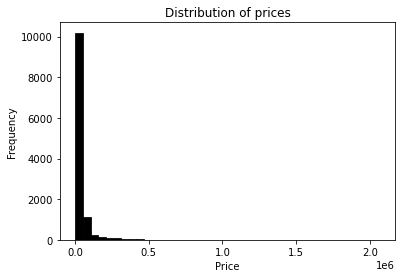

In [11]:
plt.figure(figsize=(6, 4))

sns.histplot(df.msrp, bins=40, color='black', alpha=1)
plt.ylabel('Frequency')
plt.xlabel('Price')
plt.title('Distribution of prices')

plt.show()

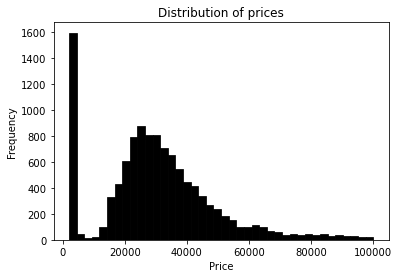

In [12]:
plt.figure(figsize=(6, 4))

sns.histplot(df.msrp[df.msrp < 100000], bins=40, color='black', alpha=1)
plt.ylabel('Frequency')
plt.xlabel('Price')
plt.title('Distribution of prices')

plt.show()

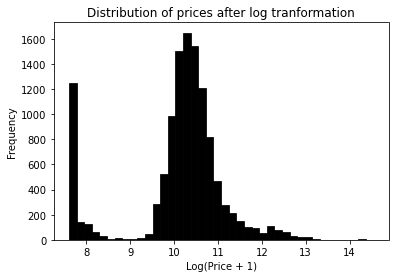

In [13]:
log_price = np.log1p(df.msrp)

plt.figure(figsize=(6, 4))

sns.histplot(log_price, bins=40, color='black', alpha=1)
plt.ylabel('Frequency')
plt.xlabel('Log(Price + 1)')
plt.title('Distribution of prices after log tranformation')

plt.show()

In [14]:
# Check for nulls --- you do NOT want nulls when you train
df.isnull().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

In [15]:
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


In [16]:
# Split the data into test, train, validation sets... 60/20/20
from sklearn.model_selection import train_test_split
df_train_full, df_test = train_test_split(df, test_size=0.2, random_state=11)
df_train, df_val = train_test_split(df_train_full, test_size=0.25, random_state=11)
len(df_train), len(df_val), len(df_test)
# Replace nulls with 0's - these are pandas dataframes
df_train = df_train.fillna(0)
df_val = df_val.fillna(0)
df_test = df_test.fillna(0)
len(df_train),len(df_val),len(df_test)

(7148, 2383, 2383)

In [17]:
#Split the y out into train/test/splits... these are numpy ndarrays ... msrp is your target variables
y_train = (df_train.msrp).values
y_val = (df_val.msrp).values
y_test = (df_test.msrp).values
del df_train['msrp']
del df_val['msrp']
del df_test['msrp']


In [18]:
# Convert these data frames into a LIST of DICTIONARIES (each element in the list is a dictionary (the record))
dict_train = df_train.to_dict(orient='records')
dict_val = df_val.to_dict(orient='records')
dict_test = df_test.to_dict(orient='records')

In [19]:
# Convert the LIST OF DICTIONARIES into a Feature Matrix (does all of the encoding)
from sklearn.feature_extraction import DictVectorizer
 
dv = DictVectorizer(sparse=False)
 
X_train = dv.fit_transform(dict_train)
X_val = dv.transform(dict_val)
X_test = dv.transform(dict_val)


In [ ]:
# %%timeit -n 1
# if you uncomment %%timeit it will not put lr into memory
# Fit the model - this will take some time and will burn CPU (not MEMORY)
lr = LinearRegression().fit(X_train, y_train)

In [29]:
# %%timeit -n 1
y_pred = lr.predict(X_test)
df_results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_results


,Actual,Predicted
0,40370,67351.025391
1,21999,37413.765625
2,27380,32751.308594
3,49515,7776.806641
4,29079,73817.050781
...,...,...
2378,21950,42209.472656
2379,27990,34148.900391
2380,63600,124453.748047
2381,47950,40280.763672


In [30]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 7753327880.000741
Mean Squared Error: 1.358234121563177e+22
Root Mean Squared Error: 116543301890.89276


In [ ]:
# View the coefficients
print(lr.intercept_)
print(lr.coef_)

15450691077650.484
[ 1.64684662e+02 -1.67798348e+13 -1.67798348e+13 ... -3.35264810e+10
 -3.35264804e+10  6.86849609e+02]


In [34]:
pred_y = lr.predict(X_test)
print("The first 10 prediction {}".format(pred_y[:10].round(0)))
print("The real first 10 labels {}".format(y_test[:10]))

mse = metrics.mean_squared_error(y_test, pred_y)
print("Mean Squared Error {}".format(mse))

The first 10 prediction [67351. 37414. 32751.  7777. 73817.  2682. 23040. 46771. 26577. 34030.]
The real first 10 labels [40370 21999 27380 49515 29079 48100 36931 87495 24080 41000]
Mean Squared Error 1.358234121563177e+22


In [35]:
type(df_train.head(1))

pandas.core.frame.DataFrame

In [36]:
# Use double brackets around the iloc to force it to return a pandas dataframe and not a series
# Then you can convert any record into a dictionary
df_train.iloc[[21]]

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity
9208,toyota,sienna,2015,regular_unleaded,266.0,6.0,automatic,front_wheel_drive,4.0,0,large,passenger_minivan,25,18,2031


In [37]:
df_train.iloc[[21]].to_dict('records')[0]

{'make': 'toyota',
 'model': 'sienna',
 'year': 2015,
 'engine_fuel_type': 'regular_unleaded',
 'engine_hp': 266.0,
 'engine_cylinders': 6.0,
 'transmission_type': 'automatic',
 'driven_wheels': 'front_wheel_drive',
 'number_of_doors': 4.0,
 'market_category': 0,
 'vehicle_size': 'large',
 'vehicle_style': 'passenger_minivan',
 'highway_mpg': 25,
 'city_mpg': 18,
 'popularity': 2031}

In [38]:
# How to convert any pandas row into a dictionary... needed for predictions
df_train.head(1).to_dict('records')[0]

{'make': 'fiat',
 'model': '500l',
 'year': 2016,
 'engine_fuel_type': 'premium_unleaded_(recommended)',
 'engine_hp': 160.0,
 'engine_cylinders': 4.0,
 'transmission_type': 'manual',
 'driven_wheels': 'front_wheel_drive',
 'number_of_doors': 4.0,
 'market_category': 0,
 'vehicle_size': 'compact',
 'vehicle_style': 'wagon',
 'highway_mpg': 33,
 'city_mpg': 25,
 'popularity': 819}

In [55]:
#car = df_train.head(1).to_dict('records')[0]
car = df_train.iloc[[323]].to_dict('records')[0]
actual = y_train[[323]]

In [56]:
def predict_single(car, dv, model):
    X = dv.transform([car])
    y_pred = model.predict(X)
    return y_pred[0]

In [57]:
predict_single(car,dv,lr)

36431.1953125

In [58]:
actual

array([43350])

In [59]:
lr.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': 'deprecated',
 'positive': False}

In [61]:
from sklearn.linear_model import SGDRegressor
sgd = SGDRegressor().fit(X_train, y_train)

In [62]:
sgd.get_params()

{'alpha': 0.0001,
 'average': False,
 'early_stopping': False,
 'epsilon': 0.1,
 'eta0': 0.01,
 'fit_intercept': True,
 'l1_ratio': 0.15,
 'learning_rate': 'invscaling',
 'loss': 'squared_error',
 'max_iter': 1000,
 'n_iter_no_change': 5,
 'penalty': 'l2',
 'power_t': 0.25,
 'random_state': None,
 'shuffle': True,
 'tol': 0.001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [71]:
param = {'alpha': [0.0001,0.001],
 'average': [False,True],
 'early_stopping': [False,True],
 'epsilon': [0.1,.001],
 'eta0': [0.01,.1],
 'fit_intercept': [True,False],
 'l1_ratio': [0.15,0.2,0.1],
 'learning_rate': ['invscaling','optimal','constant','adaptive'],
 'loss': ['squared_error','huber','epsilon_insensitive','squared_epsilon_insensitive'],
 'max_iter': [1000],
 'n_iter_no_change': [5,7],
 'penalty': ['l2','l1','elasticnet'],
 'power_t': [0.25],
 'random_state': [None],
 'shuffle': [True],
 'tol': [0.001],
 'validation_fraction': [0.1],
 'verbose': [0],
 'warm_start': [False]}

In [ ]:
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# define search
search = GridSearchCV(sgd, param, scoring='neg_mean_absolute_error', n_jobs=-1, cv=cv)
# execute search
result = search.fit(X_train, y_train)

In [ ]:
# summarize result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

In [ ]:
from sklearn.metrics import explained_variance_score,mean_absolute_error,r2_score

In [ ]:
from time import time

from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

In [ ]:
regressors = [
    KNeighborsRegressor(),
    GradientBoostingRegressor(),
    KNeighborsRegressor(),
    ExtraTreesRegressor(),
    RandomForestRegressor(),
    DecisionTreeRegressor(),
    LinearRegression(),
    Lasso(),
    Ridge()
]

In [ ]:
head = 10
for model in regressors[:head]:
    start = time()
    model.fit(X_train, y_train)
    train_time = time() - start
    start = time()
    y_pred = model.predict(X_test)
    predict_time = time()-start    
    print(model)
    print("\tTraining time: %0.3fs" % train_time)
    print("\tPrediction time: %0.3fs" % predict_time)
    print("\tExplained variance:", explained_variance_score(y_test, y_pred))
    print("\tMean absolute error:", mean_absolute_error(y_test, y_pred))
    print("\tR2 score:", r2_score(y_test, y_pred))
    print()

In [ ]:
# Assuming XGBoost is the best model - let's find the best hyperparameters

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
parameters = { 'loss' : ['ls', 'lad', 'huber', 'quantile'],
              'learning_rate' : (0.05,0.25,0.50,1),
              'criterion' : ['friedman_mse', 'mse', 'mae'],
              'max_features' : ['auto', 'sqrt', 'log2']
             }

In [ ]:
grid = GridSearchCV(GradientBoostingRegressor(),parameters)
model = grid.fit(X_sc,y)
print(model.best_params_,'\n')
print(model.best_estimator_,'\n')

In [ ]:
{'criterion': 'friedman_mse', 'learning_rate': 0.25, 'loss': 'lad', 'max_features': 'sqrt'} 

GradientBoostingRegressor(learning_rate=0.25, loss='lad', max_features='sqrt') 

In [ ]:
sns.distplot(y_pred-y_test)

In [ ]:
df_1 = pd.DataFrame(grid.cv_results_).set_index('rank_test_score').sort_index()
df_1.shape